In [239]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

# might be needed depending on your version of Jupyter
%matplotlib inline

In [240]:
df=pd.read_csv('SuperStore_Sales_Dataset.csv')
df.head()

,Row ID+O6G3A1:R6,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Profit,Returns,Payment Mode,ind1,ind2
0,4918,CA-2019-160304,01-01-2019,07-01-2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",73.94,1,28.2668,NaN,Online,NaN,NaN
1,4919,CA-2019-160304,02-01-2019,07-01-2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",173.94,3,38.2668,NaN,Online,NaN,NaN
2,4920,CA-2019-160304,02-01-2019,07-01-2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,Technology,Phones,GE 30522EE2,231.98,2,67.2742,NaN,Cards,NaN,NaN
3,3074,CA-2019-125206,03-01-2019,05-01-2019,First Class,LR-16915,Lena Radford,Consumer,United States,Los Angeles,...,Office Supplies,Storage,Recycled Steel Personal File for Hanging File ...,114.46,2,28.6150,NaN,Online,NaN,NaN
4,8604,US-2019-116365,03-01-2019,08-01-2019,Standard Class,CA-12310,Christine Abelman,Corporate,United States,San Antonio,...,Technology,Accessories,Imation Clip USB flash drive - 8 GB,30.08,2,-5.2640,NaN,Online,NaN,NaN


In [241]:
df.columns

Index(['Row ID+O6G3A1:R6', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Profit', 'Returns', 'Payment Mode', 'ind1',
       'ind2'],
      dtype='object')

In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5901 entries, 0 to 5900
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Row ID+O6G3A1:R6  5901 non-null   int64  
 1   Order ID          5901 non-null   object 
 2   Order Date        5901 non-null   object 
 3   Ship Date         5901 non-null   object 
 4   Ship Mode         5901 non-null   object 
 5   Customer ID       5901 non-null   object 
 6   Customer Name     5901 non-null   object 
 7   Segment           5901 non-null   object 
 8   Country           5901 non-null   object 
 9   City              5901 non-null   object 
 10  State             5901 non-null   object 
 11  Region            5901 non-null   object 
 12  Product ID        5901 non-null   object 
 13  Category          5901 non-null   object 
 14  Sub-Category      5901 non-null   object 
 15  Product Name      5901 non-null   object 
 16  Sales             5901 non-null   float64


In [243]:
df.describe()

,Row ID+O6G3A1:R6,Sales,Quantity,Profit,Returns,ind1,ind2
count,5901.000000,5901.000000,5901.000000,5901.000000,287.0,0.0,0.0
mean,5022.422471,265.345589,3.781901,29.700408,1.0,NaN,NaN
std,2877.977184,474.260645,2.212917,259.589138,0.0,NaN,NaN
min,1.000000,0.836000,1.000000,-6599.978000,1.0,NaN,NaN
25%,2486.000000,71.976000,2.000000,1.795500,1.0,NaN,NaN
50%,5091.000000,128.648000,3.000000,8.502500,1.0,NaN,NaN
75%,7456.000000,265.170000,5.000000,28.615000,1.0,NaN,NaN
max,9994.000000,9099.930000,14.000000,8399.976000,1.0,NaN,NaN


###  Data Cleaning
Let's clean the data and remove unwanted rows and columns and customize few others.

In [244]:
df.isnull().sum()

Row ID+O6G3A1:R6       0
Order ID               0
Order Date             0
Ship Date              0
Ship Mode              0
Customer ID            0
Customer Name          0
Segment                0
Country                0
City                   0
State                  0
Region                 0
Product ID             0
Category               0
Sub-Category           0
Product Name           0
Sales                  0
Quantity               0
Profit                 0
Returns             5614
Payment Mode           0
ind1                5901
ind2                5901
dtype: int64

No null data is available.

In [245]:
df['order_date']=pd.to_datetime(df['Order Date'])

C:\Users\swapn\AppData\Local\Temp\ipykernel_8712\3714225327.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['order_date']=pd.to_datetime(df['Order Date'])


In [246]:
df['Ship Mode'].value_counts()

Standard Class    3451
Second Class      1147
First Class        959
Same Day           344
Name: Ship Mode, dtype: int64

In [247]:
shipmode_dummies =pd.get_dummies(df['Ship Mode'],drop_first=True)
df = pd.concat([df,shipmode_dummies],axis=1)

In [248]:
df['ind1'].value_counts()

Series([], Name: ind1, dtype: int64)

In [249]:
df['ind2'].value_counts()

Series([], Name: ind2, dtype: int64)

In [250]:
df=df.drop('ind1',axis=1)
df=df.drop('ind2',axis=1)

In [251]:
df['Region'].value_counts()

West       1901
East       1688
Central    1381
South       931
Name: Region, dtype: int64

In [252]:
region_dummies =pd.get_dummies(df['Region'],drop_first=True)
df = pd.concat([df,region_dummies],axis=1)
df.head()

,Row ID+O6G3A1:R6,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Profit,Returns,Payment Mode,order_date,Same Day,Second Class,Standard Class,East,South,West
0,4918,CA-2019-160304,01-01-2019,07-01-2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,28.2668,NaN,Online,2019-01-01,0,0,1,1,0,0
1,4919,CA-2019-160304,02-01-2019,07-01-2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,38.2668,NaN,Online,2019-02-01,0,0,1,1,0,0
2,4920,CA-2019-160304,02-01-2019,07-01-2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,67.2742,NaN,Cards,2019-02-01,0,0,1,1,0,0
3,3074,CA-2019-125206,03-01-2019,05-01-2019,First Class,LR-16915,Lena Radford,Consumer,United States,Los Angeles,...,28.6150,NaN,Online,2019-03-01,0,0,0,0,0,1
4,8604,US-2019-116365,03-01-2019,08-01-2019,Standard Class,CA-12310,Christine Abelman,Corporate,United States,San Antonio,...,-5.2640,NaN,Online,2019-03-01,0,0,1,0,0,0


In [253]:
df['Segment'].value_counts()

Consumer       2997
Corporate      1774
Home Office    1130
Name: Segment, dtype: int64

In [254]:
seg_dummies =pd.get_dummies(df['Segment'],drop_first=True)
df = pd.concat([df,seg_dummies],axis=1)
df.head()

,Row ID+O6G3A1:R6,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Payment Mode,order_date,Same Day,Second Class,Standard Class,East,South,West,Corporate,Home Office
0,4918,CA-2019-160304,01-01-2019,07-01-2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,Online,2019-01-01,0,0,1,1,0,0,1,0
1,4919,CA-2019-160304,02-01-2019,07-01-2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,Online,2019-02-01,0,0,1,1,0,0,1,0
2,4920,CA-2019-160304,02-01-2019,07-01-2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,Cards,2019-02-01,0,0,1,1,0,0,1,0
3,3074,CA-2019-125206,03-01-2019,05-01-2019,First Class,LR-16915,Lena Radford,Consumer,United States,Los Angeles,...,Online,2019-03-01,0,0,0,0,0,1,0,0
4,8604,US-2019-116365,03-01-2019,08-01-2019,Standard Class,CA-12310,Christine Abelman,Corporate,United States,San Antonio,...,Online,2019-03-01,0,0,1,0,0,0,1,0


In [255]:
df['Payment Mode'].value_counts()

COD       2453
Online    2164
Cards     1284
Name: Payment Mode, dtype: int64

In [256]:
payment_dummies=pd.get_dummies(df['Payment Mode'],drop_first=True)
df=pd.concat([df,payment_dummies],axis=1)
df.head()

,Row ID+O6G3A1:R6,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Same Day,Second Class,Standard Class,East,South,West,Corporate,Home Office,Cards,Online
0,4918,CA-2019-160304,01-01-2019,07-01-2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,0,0,1,1,0,0,1,0,0,1
1,4919,CA-2019-160304,02-01-2019,07-01-2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,0,0,1,1,0,0,1,0,0,1
2,4920,CA-2019-160304,02-01-2019,07-01-2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,0,0,1,1,0,0,1,0,1,0
3,3074,CA-2019-125206,03-01-2019,05-01-2019,First Class,LR-16915,Lena Radford,Consumer,United States,Los Angeles,...,0,0,0,0,0,1,0,0,0,1
4,8604,US-2019-116365,03-01-2019,08-01-2019,Standard Class,CA-12310,Christine Abelman,Corporate,United States,San Antonio,...,0,0,1,0,0,0,1,0,0,1


In [257]:
#as United States is the only country, we can drop it.
df=df.drop('Country',axis=1)

In [258]:
df['State'].value_counts().nunique()
#43 different states will be there

43

In [259]:
df['Category'].value_counts().nunique()
#43 different states will be there

3

In [260]:
payment_dummies=pd.get_dummies(df['Category'],drop_first=True)
df=pd.concat([df,payment_dummies],axis=1)

In [261]:
#As product id and order id are of no use in data analysis as they are all unique, we can drop it.
df=df.drop('Order ID',axis=1)
df=df.drop('Customer ID',axis=1)
df=df.drop('Customer Name',axis=1)
df=df.drop('Product ID',axis=1)
df=df.drop('Row ID+O6G3A1:R6',axis=1)
df=df.drop('Order Date',axis=1)

In [262]:
df['Sub-Category'].value_counts().nunique()

17

In [263]:
df['Returns'].value_counts().nunique()

1

In [264]:
#As there is only 1 case of return, we can remove that row and drop return column as well.
df = df[df['Returns'] != 1]
df=df.drop('Returns',axis=1)

In [265]:
df['Product Name'].value_counts().nunique()

16

In [266]:
df['months_no']=df['order_date'].apply(lambda x: x.month)
df['day_no']=df['order_date'].apply(lambda x: x.day)
df['year']=df['order_date'].apply(lambda x: x.year)



In [267]:
df['month'] = df['months_no'].map({
    1:'January', 2:'February', 3:'March', 4:'April', 5:'May',
    6:'June', 7:'July', 8:'August', 9:'September', 10:'October',
    11:'November', 12:'December'})


month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df['month'] = pd.Categorical(df['month'], categories=month_order, ordered=True)

df['days']=df['day_no'].map({1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday',6:'Saturday', 7:'Sunday'})

In [268]:
df.columns

Index(['Ship Date', 'Ship Mode', 'Segment', 'City', 'State', 'Region',
       'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity',
       'Profit', 'Payment Mode', 'order_date', 'Same Day', 'Second Class',
       'Standard Class', 'East', 'South', 'West', 'Corporate', 'Home Office',
       'Cards', 'Online', 'Office Supplies', 'Technology', 'months_no',
       'day_no', 'year', 'month', 'days'],
      dtype='object')

In [269]:
df.head()

,Ship Date,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,...,Home Office,Cards,Online,Office Supplies,Technology,months_no,day_no,year,month,days
0,07-01-2019,Standard Class,Corporate,Gaithersburg,Maryland,East,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",73.94,...,0,0,1,0,0,1,1,2019,January,Monday
1,07-01-2019,Standard Class,Corporate,Gaithersburg,Maryland,East,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",173.94,...,0,0,1,0,0,2,1,2019,February,Monday
2,07-01-2019,Standard Class,Corporate,Gaithersburg,Maryland,East,Technology,Phones,GE 30522EE2,231.98,...,0,1,0,0,1,2,1,2019,February,Monday
3,05-01-2019,First Class,Consumer,Los Angeles,California,West,Office Supplies,Storage,Recycled Steel Personal File for Hanging File ...,114.46,...,0,0,1,1,0,3,1,2019,March,Monday
4,08-01-2019,Standard Class,Corporate,San Antonio,Texas,Central,Technology,Accessories,Imation Clip USB flash drive - 8 GB,30.08,...,0,0,1,0,1,3,1,2019,March,Monday


### Exploratory data Analysis

Let's visualize and find out some information regarding the data.

C:\Users\swapn\AppData\Local\Temp\ipykernel_8712\1028284977.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  x1 = df[df['year']==2019].groupby("month").sum()['Sales']
C:\Users\swapn\AppData\Local\Temp\ipykernel_8712\1028284977.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  x2 = df[df['year']==2020].groupby("month").sum()['Sales']


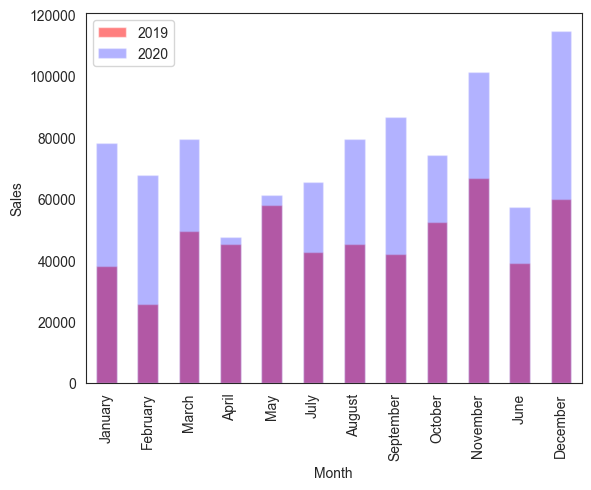

In [270]:

x1 = df[df['year']==2019].groupby("month").sum()['Sales']
x2 = df[df['year']==2020].groupby("month").sum()['Sales']

x1 = x1.reindex(df['month'].unique())  # Reindexing to ensure months are in order
x2 = x2.reindex(df['month'].unique()) 

x1.plot(kind='bar',alpha=0.5,color='red',label='2019')

x2.plot(kind='bar',alpha=0.3,color='blue',label='2020')
plt.legend()
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

Clearly, the sales in 2020 has increased than from 2019. Maximum increase in sales is observed in the month of February with an increase of around 250%

C:\Users\swapn\AppData\Local\Temp\ipykernel_8712\3435693234.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  x1=df[df['year']==2019].groupby('month').sum()['Profit']
C:\Users\swapn\AppData\Local\Temp\ipykernel_8712\3435693234.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  x2=df[df['year']==2020].groupby('month').sum()['Profit']


Text(0.5, 1.0, 'Profit over months')

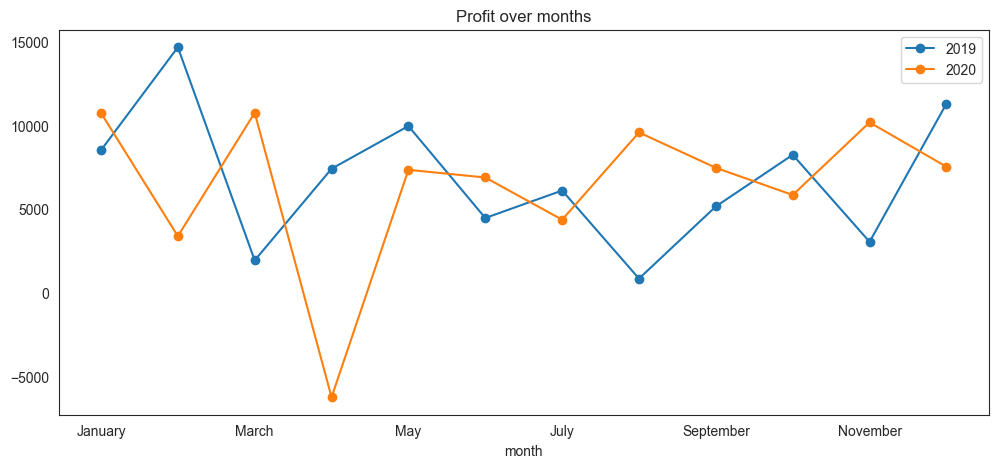

In [271]:
plt.figure(figsize=(12,5))
x1=df[df['year']==2019].groupby('month').sum()['Profit']
x2=df[df['year']==2020].groupby('month').sum()['Profit']
x1.plot(marker='o',label=2019)
x2.plot(marker='o',label=2020)
plt.legend()
plt.title('Profit over months')

Maximum profit was observed in month of February of 2019. 
Loss is observed in month of April 2020.
Maximum profit in 2019 was in the month of February.
Maximum profit in 2020 was in the month of January and March.

<AxesSubplot: xlabel='Ship Mode', ylabel='count'>

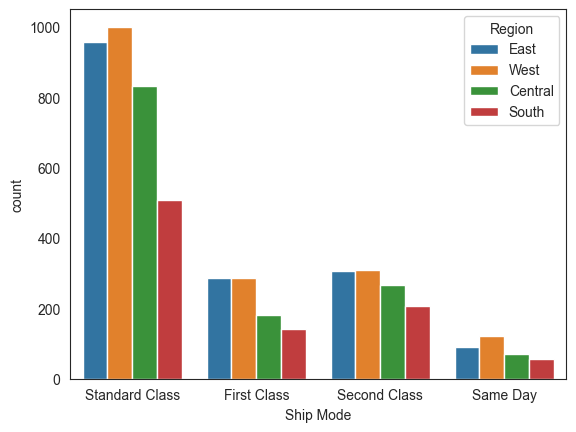

In [272]:
sns.countplot(x='Ship Mode',data=df,hue='Region')

Shipment mode is primarily through Standard Class and least on same day. Most number of orders are from Western part of the country and least from southern part.

C:\Users\swapn\AppData\Local\Temp\ipykernel_8712\1471826034.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Payment Mode',data=df,palette='rainbow',width=0.4)


<AxesSubplot: xlabel='Payment Mode', ylabel='count'>

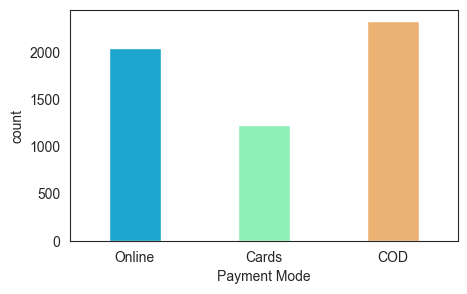

In [273]:
plt.figure(figsize=(5,3))
sns.countplot(x='Payment Mode',data=df,palette='rainbow',width=0.4)

Most order are Cash on delivery (COD) and least are pre-paid through Cards.

<AxesSubplot: xlabel='Category', ylabel='count'>

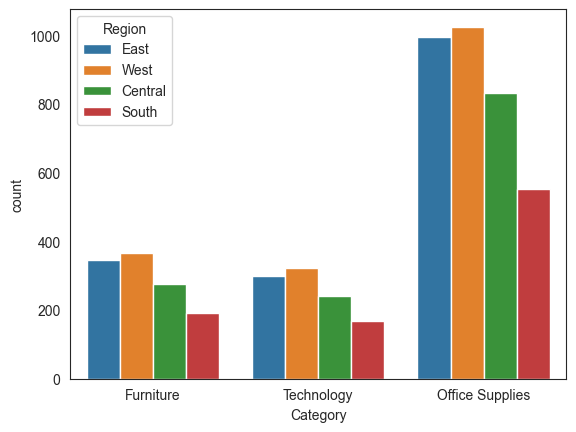

In [274]:
sns.countplot(x='Category',data=df,hue='Region')

Highest number of sales are observed in Office Supplies, especially in western and eastern part of the country.

<AxesSubplot: xlabel='Segment', ylabel='count'>

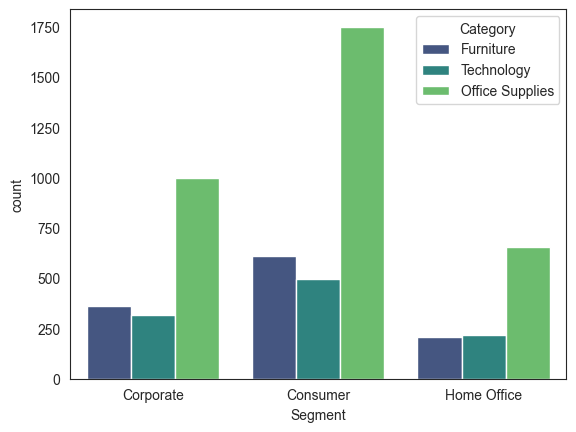

In [275]:
sns.countplot(x='Segment',data=df,palette='viridis',hue='Category')

Most of the office supplies belong to Consumer Segment. 

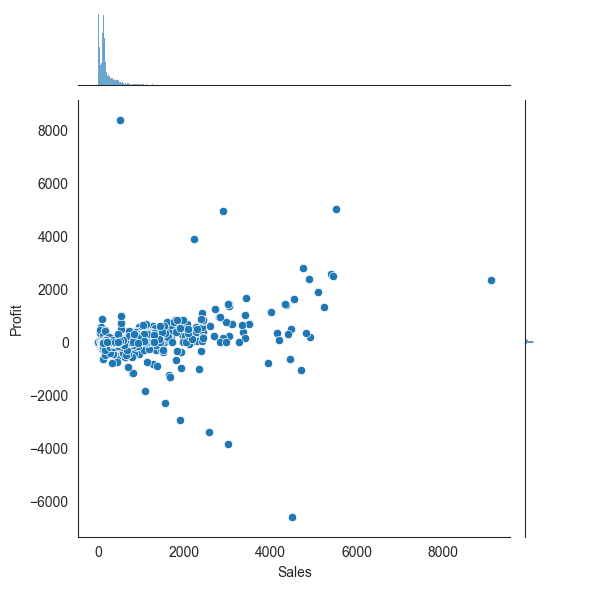

In [276]:
sns.jointplot(x='Sales',y='Profit',data=df)

<AxesSubplot: xlabel='Sub-Category', ylabel='Count'>

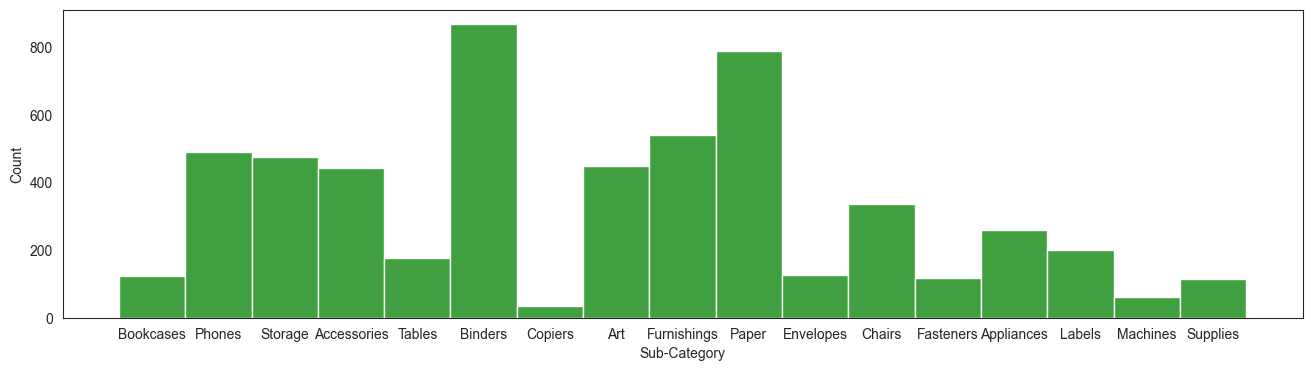

In [277]:
plt.figure(figsize=(16,4))
sns.histplot(x='Sub-Category',data=df, color='green')

Maximum numbers of order were placed in the sub-category of Binders followed Paper and Furnishings. Least orders were made for copiers and machines.

(-100.0, 100.0)

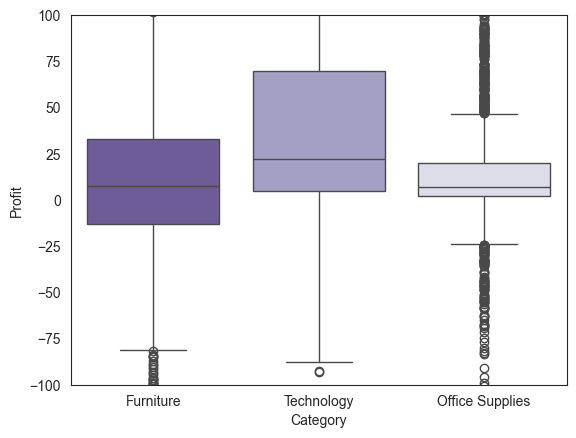

In [278]:
sns.boxplot(x='Category',y='Profit',data=df,palette='Purples_r',hue='Category')
plt.ylim(-100,100)

C:\Users\swapn\AppData\Local\Temp\ipykernel_8712\3230384985.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  x1 = df[df['year']==2019].groupby("Segment").sum()['Sales']


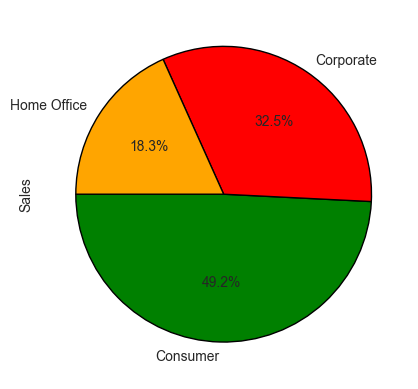

In [279]:

x1 = df[df['year']==2019].groupby("Segment").sum()['Sales']
x1.plot(kind='pie',autopct="%1.1f%%",wedgeprops={'linewidth':1,'edgecolor':'black'},startangle=180,colors=('green','red','orange'))
plt.show()

49.2% orders are from Consumer segment,making it the largest orrdering sector. 32.5% from Corporate and rest 18.3% from Home office.

C:\Users\swapn\AppData\Local\Temp\ipykernel_8712\793931322.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  x1=df[(df['Segment']=='Consumer') & (df['year']==2019)].groupby('month').sum()['Sales']
C:\Users\swapn\AppData\Local\Temp\ipykernel_8712\793931322.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  x2=df[(df['Segment']=='Corporate') & (df['year']==2019)].groupby('month').sum()['Sales']
C:\Users\swapn\AppData\Local\Temp\ipykernel_8712\793931322.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either 

Text(0.5, 1.0, 'Product consumed over 2019')

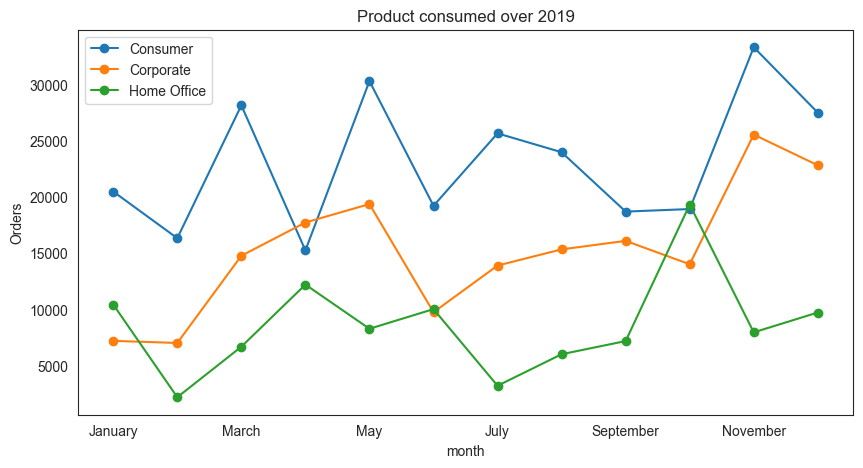

In [280]:
plt.figure(figsize=(10,5))
x1=df[(df['Segment']=='Consumer') & (df['year']==2019)].groupby('month').sum()['Sales']
x2=df[(df['Segment']=='Corporate') & (df['year']==2019)].groupby('month').sum()['Sales']
x3=df[(df['Segment']=='Home Office') & (df['year']==2019)].groupby('month').sum()['Sales']
x1.plot(label='Consumer',marker="o")
x2.plot(label='Corporate',marker="o")
x3.plot(label='Home Office',marker="o")
plt.legend()
plt.ylabel('Orders')
plt.title('Product consumed over 2019')

In 2019, ighest sale in Consumer sector is observed in November and least in April. Highest sale in Corporate sector is observed in November and least in Febuary.
Highest sale in Home office sector is observed in November and least in Febuary.

C:\Users\swapn\AppData\Local\Temp\ipykernel_8712\489978859.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  x1=df[(df['Segment']=='Consumer') & (df['year']==2020)].groupby('month').sum()['Sales']
C:\Users\swapn\AppData\Local\Temp\ipykernel_8712\489978859.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  x2=df[(df['Segment']=='Corporate') & (df['year']==2020)].groupby('month').sum()['Sales']
C:\Users\swapn\AppData\Local\Temp\ipykernel_8712\489978859.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either 

Text(0.5, 1.0, 'Product consumed over 2020')

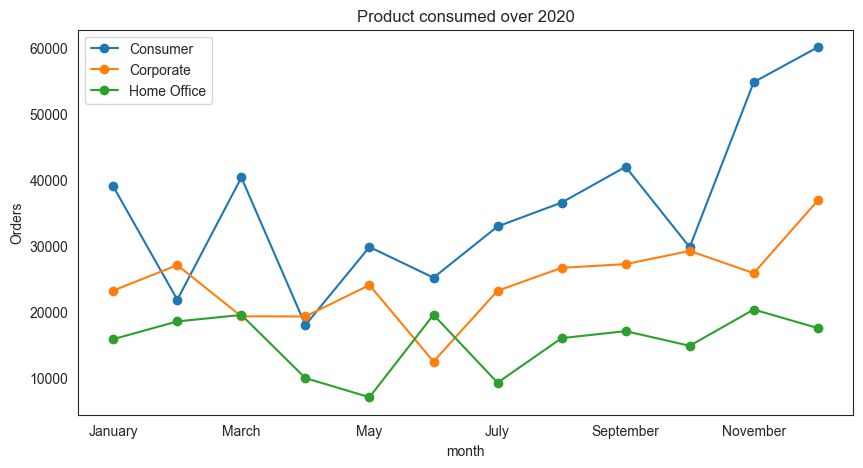

In [281]:
plt.figure(figsize=(10,5))
x1=df[(df['Segment']=='Consumer') & (df['year']==2020)].groupby('month').sum()['Sales']
x2=df[(df['Segment']=='Corporate') & (df['year']==2020)].groupby('month').sum()['Sales']
x3=df[(df['Segment']=='Home Office') & (df['year']==2020)].groupby('month').sum()['Sales']
x1.plot(label='Consumer',marker="o")
x2.plot(label='Corporate',marker="o")
x3.plot(label='Home Office',marker="o")
plt.legend()
plt.ylabel('Orders')
plt.title('Product consumed over 2020')

In 2020, highest sale in Consumer sector is observed in December and least in April. Highest sale in Corporate sector is observed in November and least in June.
Highest sale in Home office sector is observed in March and least in May.

C:\Users\swapn\AppData\Local\Temp\ipykernel_8712\3536321282.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  x1 = df.groupby(['Category', 'Segment']).sum()


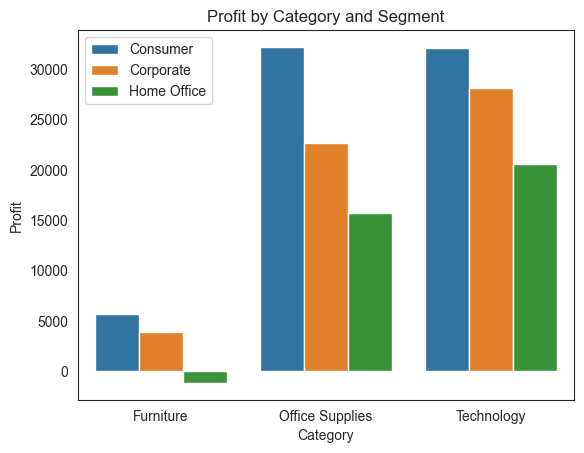

In [282]:
x1 = df.groupby(['Category', 'Segment']).sum()

sns.barplot(x='Category', y='Profit', hue='Segment', data=x1)
plt.ylabel('Profit')
plt.title('Profit by Category and Segment')
plt.legend()
plt.show()


Maximum profit is observed in consumer sector in both office supplies and technology while loss in home office sector in furniture.

### Data Modeling and Prediction
Let's predict sales, and profit over time.

In [283]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,confusion_matrix,classification_report,mean_absolute_error

Using train test split from scikit to split test data into two train and test module.

In [284]:
X = df[['year', 'months_no']]
y_sales = df['Sales']
y_profit = df['Profit']

# Train-Test Split
X_train, X_test, y_train_sales, y_test_sales = train_test_split(X, y_sales, test_size=0.3, random_state=101)
X_train, X_test, y_train_profit, y_test_profit = train_test_split(X, y_profit, test_size=0.3, random_state=101)


Modelling : Creating a linear regression model and fitting the data for sales and profit prediction.

In [285]:
model_sales = LinearRegression()
model_sales.fit(X_train, y_train_sales)

model_profit = LinearRegression()
model_profit.fit(X_train, y_train_profit)

LinearRegression()

Predictions: Predicting the sales and profit using months and year.

In [286]:
y_pred_sales = model_sales.predict(X_test)
y_pred_profit = model_profit.predict(X_test)

Evaluating model's efficiency.

In [287]:
mse_sales = mean_squared_error(y_test_sales, y_pred_sales)
mae_sales = mean_absolute_error(y_test_sales, y_pred_sales)
r2_sales = r2_score(y_test_sales, y_pred_sales)

mse_profit = mean_squared_error(y_test_profit, y_pred_profit)
mae_profit = mean_absolute_error(y_test_profit, y_pred_profit)
r2_profit = r2_score(y_test_profit, y_pred_profit)

print(f"Sales Prediction - Mean Squared Error: {mse_sales}")
print(f"Sales Prediction - Mean Absolute Error: {mae_sales}")
print(f"Sales Prediction - R^2 Score: {r2_sales}")

print(f"Profit Prediction - Mean Squared Error: {mse_profit}")
print(f"Profit Prediction - Mean Absolute Error: {mae_profit}")
print(f"Profit Prediction - R^2 Score: {r2_profit}")

Sales Prediction - Mean Squared Error: 246812.32571214484
Sales Prediction - Mean Absolute Error: 247.28954163784707
Sales Prediction - R^2 Score: 0.006992836914776035
Profit Prediction - Mean Squared Error: 36789.45608345555
Profit Prediction - Mean Absolute Error: 62.13847210679879
Profit Prediction - R^2 Score: -0.00023154636148237095


Plotting predicted data to actual data.

In [288]:
a=y_test_sales.index.sort_values()
b=y_test_profit.index.sort_values()


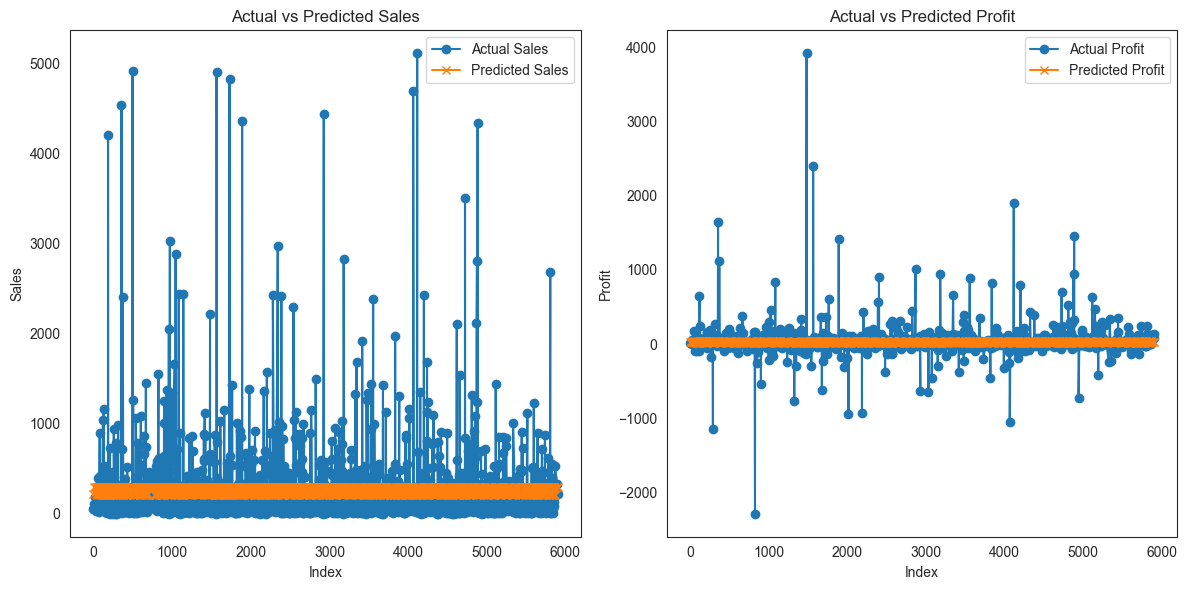

In [289]:
plt.figure(figsize=(12, 6))

# Sales Plot
plt.subplot(1, 2, 1)
plt.plot(a, y_test_sales, label='Actual Sales', marker='o')
plt.plot(a, y_pred_sales, label='Predicted Sales', marker='x')
plt.xlabel('Index')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales')
plt.legend()

# Profit Plot
plt.subplot(1, 2, 2)
plt.plot(b, y_test_profit, label='Actual Profit', marker='o')
plt.plot(b, y_pred_profit, label='Predicted Profit', marker='x')
plt.xlabel('Index')
plt.ylabel('Profit')
plt.title('Actual vs Predicted Profit')
plt.legend()

plt.tight_layout()
plt.show()

The model is trained and fitted linearly for both the models, better for profit prediction than for sales prediction.

In [290]:
import random
random.seed()
random_ind = random.randint(0,len(df))

new_customer = df[['year', 'months_no']].iloc[random_ind]
new_customer

year         2019
months_no       5
Name: 1923, dtype: int64

Randomly checking and predicting the value from the data.

In [291]:
model_sales.predict(new_customer.values.reshape(1,2))

c:\Program Files\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([213.33076843])

In [292]:
df.iloc[random_ind]['Sales']

51.75

The model is now fitted and ready to be implemented further.